In [59]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF/')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dendrone_pore.py_files.dendrons_pore import dendrons_pore
from dendrone_pore.py_files.create_in import create_in

Параметры

In [60]:
Cs = 0.001
chi = 0.5
alpha = 0.5
S = 150

D = 300

g = 0
q = 1
n = 300

Структура полимера:

In [61]:
# Первое поколоение g = 1, разветвленность 1
g1_q1 = f'(P0)1(P){n-2}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
print(f"Первое поколение разветвленность 1 {g1_q1=}")

# Линейная цепочка
g0_q1 = f'(P0)1(P){n}(E)1'
print(f"Линейная цепочка {g0_q1=}")

Первое поколение разветвленность 1 g1_q1='(P0)1(P)298(E)1[(P)299(E)1](P)299(E)1'
Линейная цепочка g0_q1='(P0)1(P)300(E)1'


In [62]:
N, theta, H_dendrons, r_in_dendrons, r_out_dendrons,\
    psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, rho_dendrons = dendrons_pore(
    
    Cs = Cs,
    #параметры щетки
    alpha = alpha,
    S = S,
    
    #параметры поры
    D = D,
    
    #параметры дендрона
    g = g,
    q = q,
    n = n)

In [63]:
file_name_pro = create_in(template_pore = '/home/tpopova/prj/PB_SCF/dendrone_pore/scf_templates/first_gen.in',
    
    #название параметра
    range_param = 'Cs',
    min_val  = 0.1,
    max_val  = 0.1,
    
    Cs  = Cs,
    chi = chi, 
    
    D  = D,
    N  = N,
    S  = S,
    alpha  = alpha,
    
    pol_structure  = f"{g0_q1}")

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.484846e+00 |g| = 7.050237e+00 alpha = 1.000000e+00 
hessian scaling: 2.73544
it =  1  E = 2.158332e+00 |g| = 5.851054e+00 alpha = 1.141839e-01 
it =  2  E = 1.624492e+00 |g| = 5.877184e+00 alpha = 1.905923e-01 
it =  3  E = 4.912195e+00 |g| = 5.536631e+00 alpha = 1.816598e-02 
it =  4  E = 2.496914e+00 |g| = 5.501012e+00 alpha = 6.514990e-02 
it =  5  E = 5.583505e+00 |g| = 5.276566e+00 alpha = 1.168127e-02 
it =  6  E = 2.601588e+00 |g| = 5.278112e+00 alpha = 5.061643e-02 
it =  7  E = 1.539033e+01 |g| = 5.091571e+00 alpha = 1.314641e-03 
it =  8  E = 2.558207e+00 |g| = 5.106427e+00 alpha = 4.518529e-02 
it =  9  E = 9.747886e+00 |g| = 5.224706e+00 alpha = 3.364026e-03 
it =  10  E = 3.427890e+00 |g| = 5.258288e+00

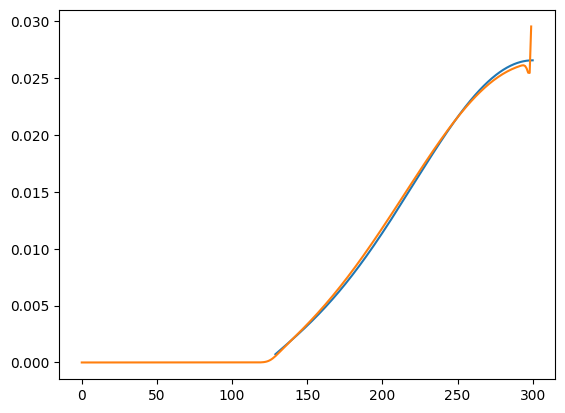

In [64]:
scf_prof_phi = pd.read_csv(file_name_pro,sep='\t')['mol_pol_phi']
plt.plot(r_in_dendrons, c_pol_dendrons)
plt.plot(scf_prof_phi)
